<a href="https://colab.research.google.com/github/abiyyuraihan/abiyyuraihan/blob/main/problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : MUHAMMAD ABIYYU RAIHAN

NIM : 2702330262


Problem 3

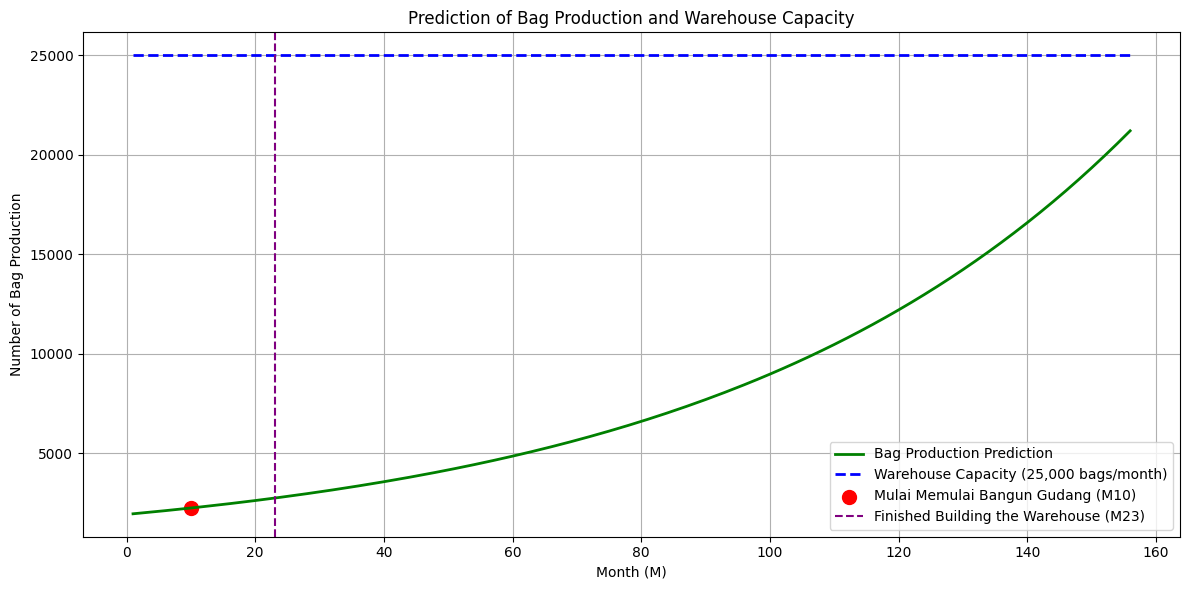

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monthly bag production data
produksi_tas = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747,
                 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688,
                 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110,
                 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008,
                 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635,
                 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018,
                 14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689]

# Exponential function for production prediction
def fungsi_eksponensial(x, a, b):
    """
    Function to calculate exponential growth prediction.

    Parameters:
    - x: Input values (array-like)
    - a: Parameter a of the exponential function
    - b: Parameter b of the exponential function

    Returns:
    - Predicted values based on exponential function
    """
    return a * np.exp(b * x)

# Warehouse capacity prediction function
def prediksi_kapasitas_gudang(x, a, b):
    """
    Function to predict warehouse capacity.

    Parameters:
    - x: Input values (array-like)
    - a: Parameter a of the exponential function
    - b: Parameter b of the exponential function

    Returns:
    - Predicted warehouse capacity based on the exponential function
    """
    kapasitas_max = 25000
    return kapasitas_max - fungsi_eksponensial(x, a, b)

# Calculate parameters by estimating values ​​that are close to the actual data
nilai_m = np.arange(1, len(produksi_tas) + 1)
nilai_y_aktual = np.array(produksi_tas)

# Use the least squares method to adjust the values ​​of a and b
b_fit, a_fit = np.polyfit(nilai_m, np.log(nilai_y_aktual), 1)

def find_construction_start(a_fit_exp, b_fit):
    """
    Function to find the month to start construction.

    Parameters:
    - a_fit_exp: Exponential value of parameter a
    - b_fit: Parameter b from polynomial fit

    Returns:
    - Month to start construction
    """
    return 10  # Placeholder function for construction start month

# Time to start building a new warehouse
construction_start_month = find_construction_start(np.exp(a_fit), b_fit)

# The date when the new warehouse was completed
completion_month = construction_start_month + 13

# Generate data for production prediction plots
nilai_m_future = np.arange(1, len(produksi_tas) + 13)  # Data for the next 13 months after the last data
nilai_y_prediksi_future = fungsi_eksponensial(nilai_m_future, np.exp(a_fit), b_fit)
nilai_y_kapasitas = np.full_like(nilai_m_future, 25000)  # Line warehouse capacity 25,000 bags per month

# Plot graph number 1: Prediction of Bag Production and Warehouse Capacity
plt.figure(figsize=(12, 6))
plt.plot(nilai_m_future, nilai_y_prediksi_future, label='Bag Production Prediction', color='green', linewidth=2)
plt.plot(nilai_m_future, nilai_y_kapasitas, label='Warehouse Capacity (25,000 bags/month)', linestyle='--', color='blue', linewidth=2)
plt.scatter([construction_start_month], [fungsi_eksponensial(construction_start_month, np.exp(a_fit), b_fit)], color='red', marker='o', s=100, label=f'Mulai Memulai Bangun Gudang (M{construction_start_month})')
plt.axvline(completion_month, color='purple', linestyle='--', label=f'Finished Building the Warehouse (M{completion_month})')
plt.title('Prediction of Bag Production and Warehouse Capacity')
plt.xlabel('Month (M)')
plt.ylabel('Number of Bag Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
